# Verzeo Outstanding Project Problem Statement 2

# Task : To predict the Price of House for Surprise Housing Company 

#### completed by - Harshit Raj

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
np.random.seed(42)

In [144]:
housing = pd.read_csv('D:/Work/verzeo/outstanding project phase/ps2/train.csv')

In [145]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [146]:
housing.shape

(1460, 81)

In [147]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [148]:
housing.shape

(1460, 81)

In [149]:
# percentage of null values in a column
def null_values(housing = housing):
    columns = housing.columns
    null = []
    for col in columns:
        null_percent = (housing[col].isnull().sum()/housing.shape[0])*100
        null.append(null_percent)

    null_percent = pd.DataFrame({'column_name' : columns,'percentage' : null})
    return null_percent[null_percent['percentage'] != 0]
    
null_percent = null_values(housing)
null_percent

,column_name,percentage
3,LotFrontage,17.739726
6,Alley,93.767123
25,MasVnrType,0.547945
26,MasVnrArea,0.547945
30,BsmtQual,2.534247
31,BsmtCond,2.534247
32,BsmtExposure,2.602740
33,BsmtFinType1,2.534247
35,BsmtFinType2,2.602740
42,Electrical,0.068493


In [150]:
# dropping all columns with more than 50% null values
housing_clean = housing.drop(null_percent[null_percent['percentage'] > 50.0]['column_name'], axis = 1)
print('old shape - ', housing.shape,'\n'+'new shape - ', housing_clean.shape)

old shape -  (1460, 81) 
new shape -  (1460, 77)


In [151]:
null_values(housing_clean)

,column_name,percentage
3,LotFrontage,17.739726
24,MasVnrType,0.547945
25,MasVnrArea,0.547945
29,BsmtQual,2.534247
30,BsmtCond,2.534247
31,BsmtExposure,2.602740
32,BsmtFinType1,2.534247
34,BsmtFinType2,2.602740
41,Electrical,0.068493
56,FireplaceQu,47.260274


In [152]:
# Let's deal with FireplaceQu which has 47 % null values

print(housing_clean['FireplaceQu'].value_counts())
print(housing_clean['FireplaceQu'].value_counts().sum(), ' Houses have Fireplaces')

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
770  Houses have Fireplaces


In [153]:
#the rest are Null since they have no fireplace
#therefore replacing null with NA
housing_clean['FireplaceQu'].fillna('NA', inplace = True)
print(housing_clean['FireplaceQu'].value_counts())

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


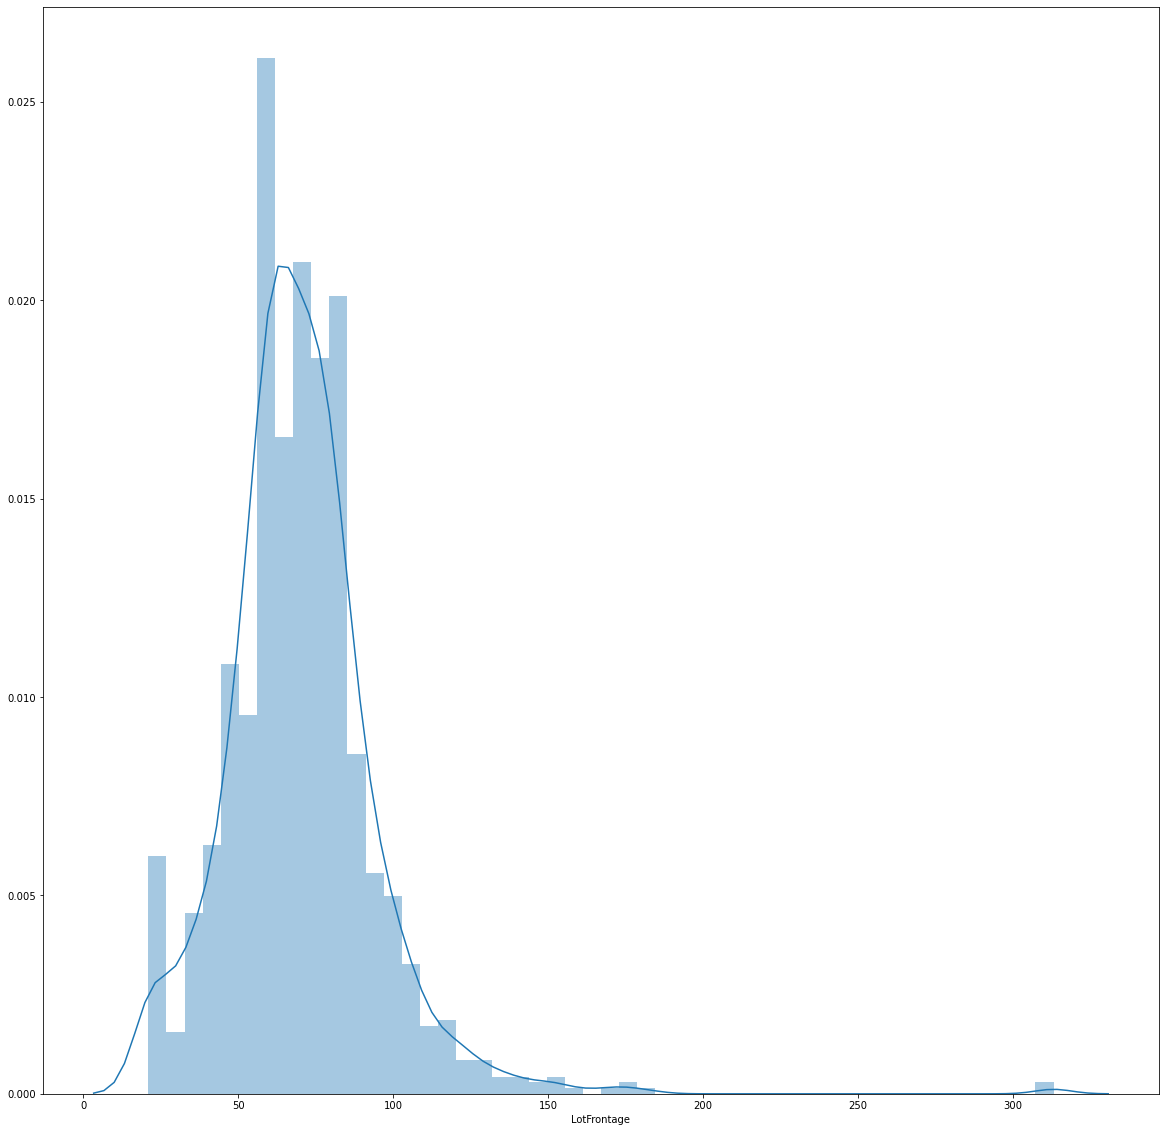

In [154]:
# Let's deal with LotFrontage which has 17 % null values
sns.distplot(housing_clean['LotFrontage'])
plt.show()

In [155]:
#Lot frontage has gaussian distribution therefore null values can be replaced with mean
lotfront_mean = housing_clean['LotFrontage'].median()
housing_clean['LotFrontage'].fillna(lotfront_mean, inplace = True)

In [156]:
# Dealing with GarageType GarageYrBlt GarageFinish GarageQual GarageCond
# from the data we know that if garage is absent the these 4 columns will have NA in them
# replacing categorical null values as NA and numeric null values as 0

# Just like garage, basement,Electrical and MasVnrType categorical values are also replaced with NA
# MasVnrArea are replaced with 0
nulls = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 
          'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType','MasVnrArea','Electrical']
for col in nulls:
    if housing_clean[col].dtype == 'object':
        housing_clean[col].fillna('NA',inplace = True)
    else:
        housing_clean[col].fillna(0.0,inplace = True)

In [157]:
# Also dropping Id as they don't play any role in prediction
housing_clean.drop('Id',axis = 1, inplace = True)

In [158]:
housing_clean.isnull().any().any()

False

## EDA

In [159]:
housing_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [160]:
# creating categorical and numeric column name list to easily perform EDA
categorical_col = []
numerical_col = []
for col in housing_clean.columns:
    if housing_clean[col].dtype == object:
        categorical_col.append(col)
    else:
        numerical_col.append(col)
        
print(len(numerical_col),'columns are Numerical')
print(len(categorical_col),'columns are categorical')

37 columns are Numerical
39 columns are categorical


In [161]:
numerical_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

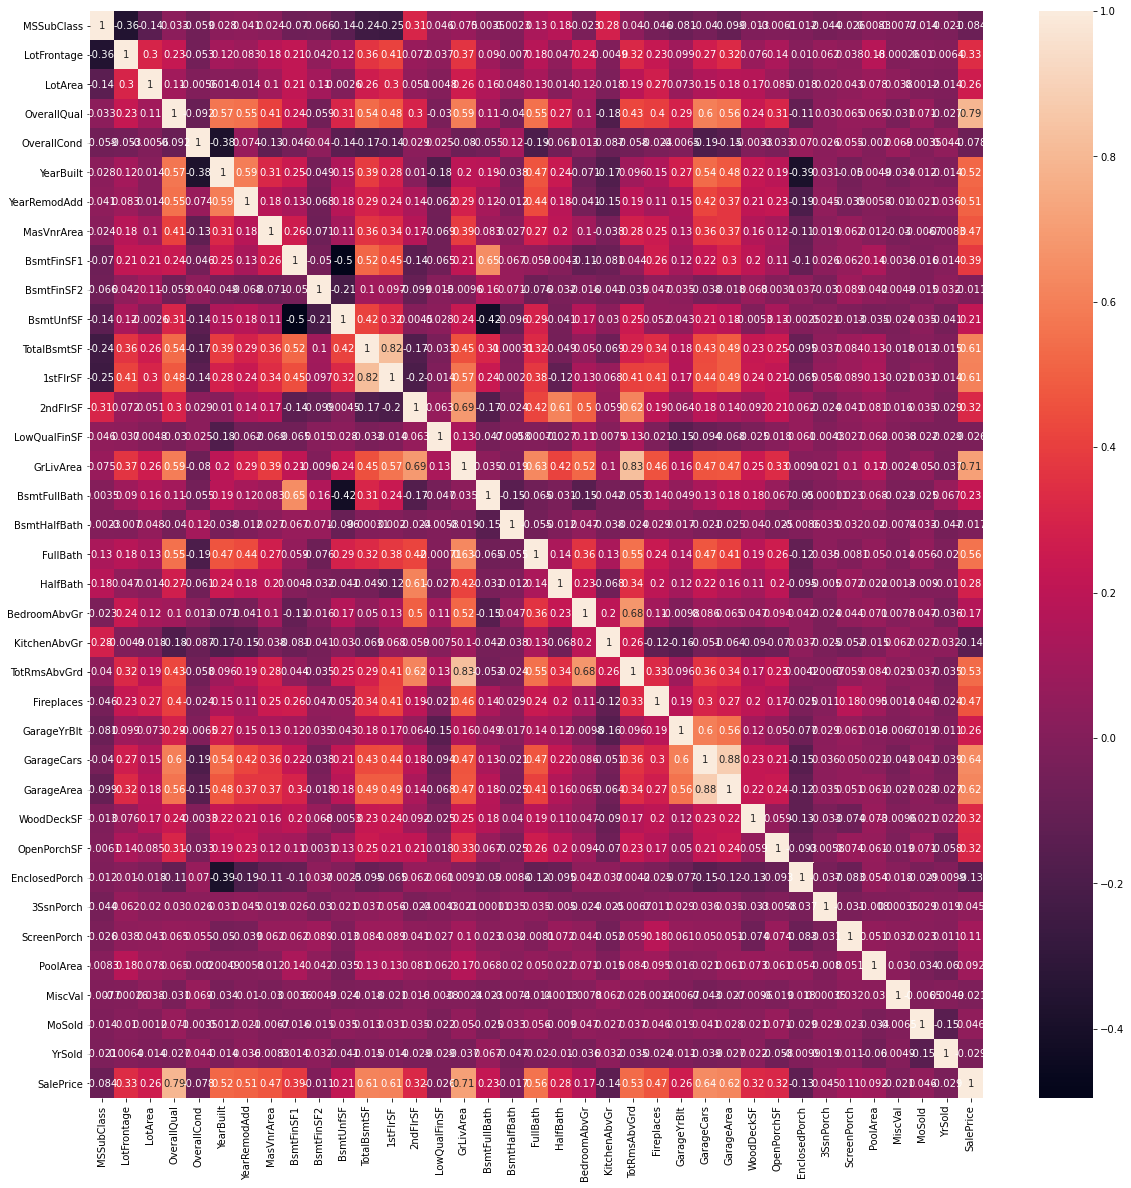

In [162]:
plt.rcParams['figure.figsize'] = (20.0, 20)
sns.heatmap(housing_clean.corr(),annot = True)

It is too complex to derive any understanding about the data

## Numerical column Plot for insights for Surprise Housing Company 

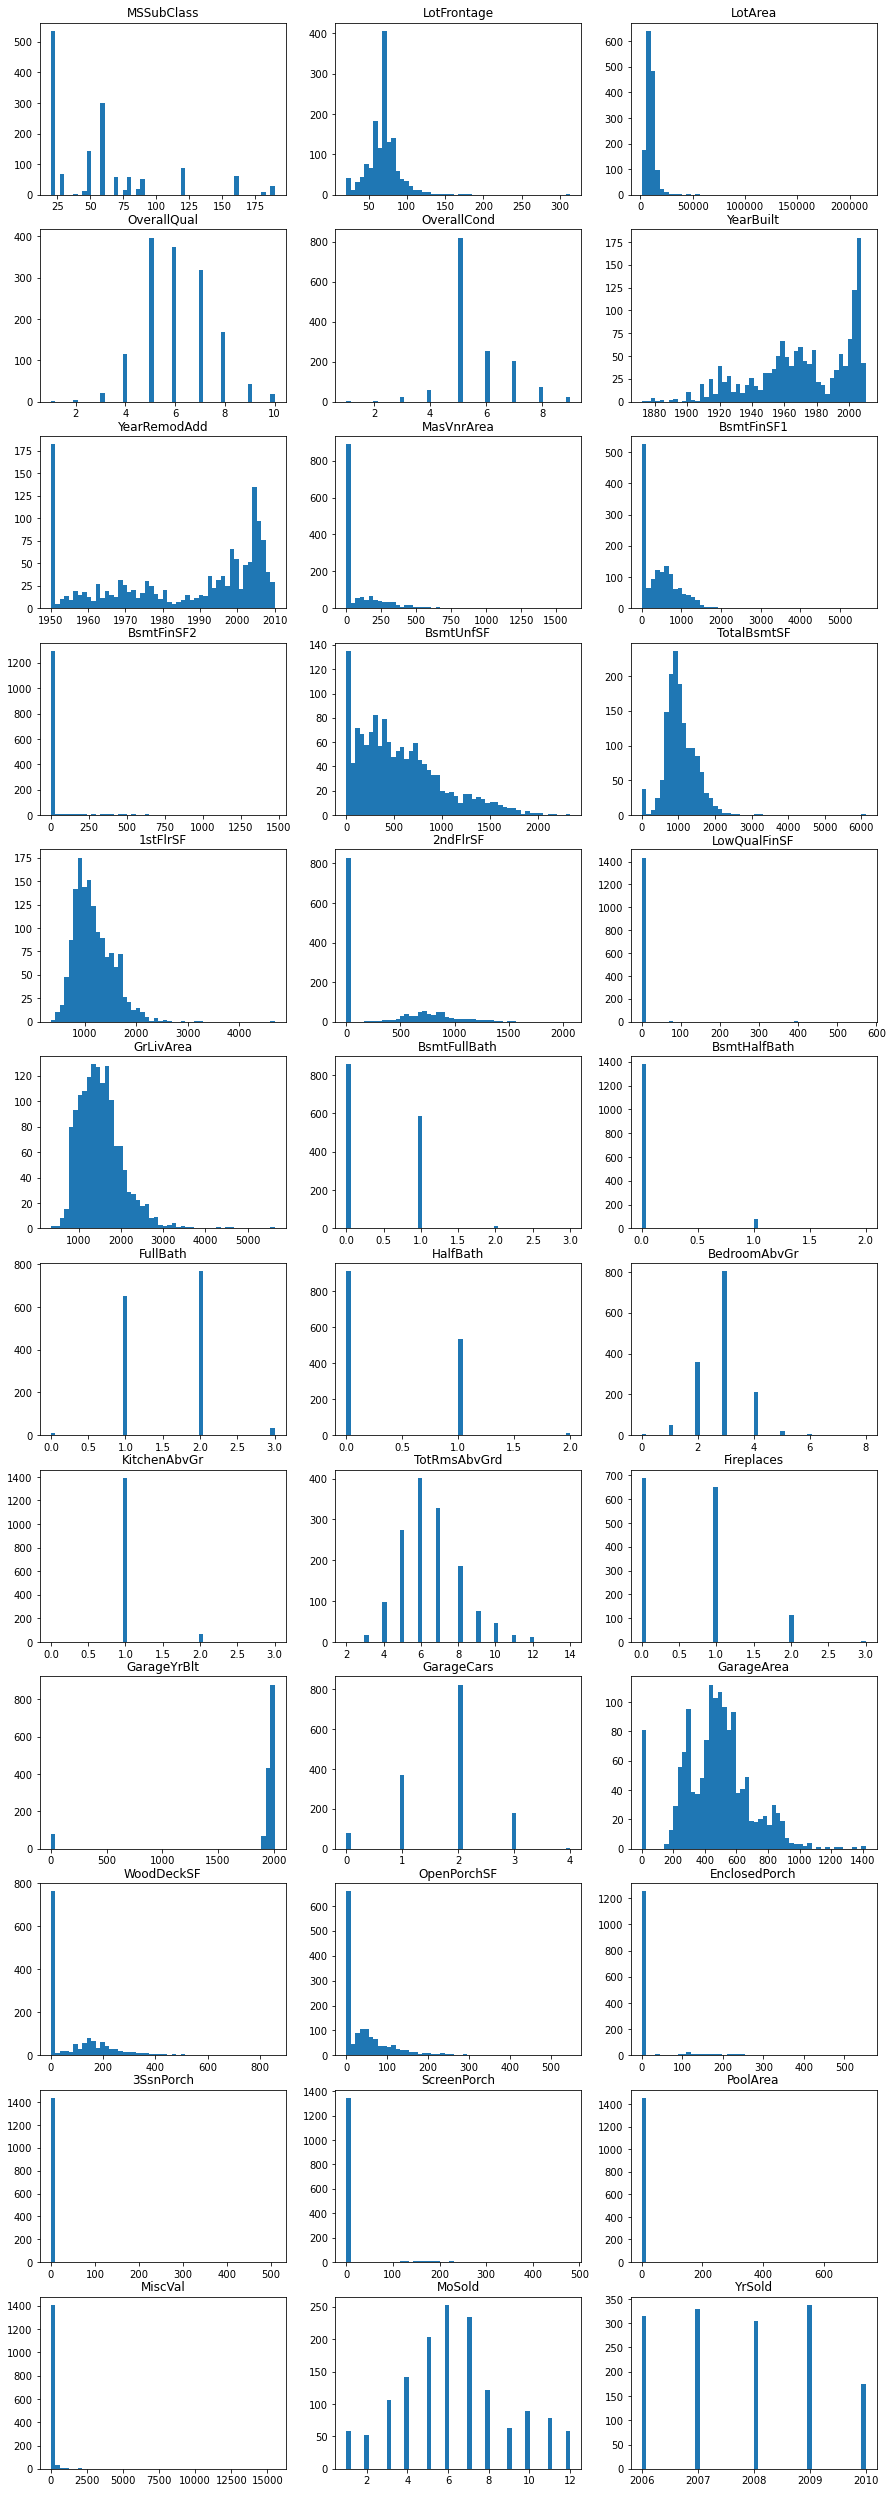

In [163]:
# plotting distribution of numerical data

n_columns = 3   # max figures in single row
n_rows = int(len(numerical_col)/n_columns)  # max number of rows
fig,a = plt.subplots(n_rows, n_columns,figsize = (15,45))

current_row = 0
current_col = 0
total_fig = 0
for col in numerical_col:
    if current_row == n_rows:
        break
    a[current_row][current_col].hist(housing_clean[col],bins = 50)  # y axis is sales price
    a[current_row][current_col].set_title(col)
    current_col +=1
    if current_col%3 == 0:
        current_row += 1
        current_col = 0

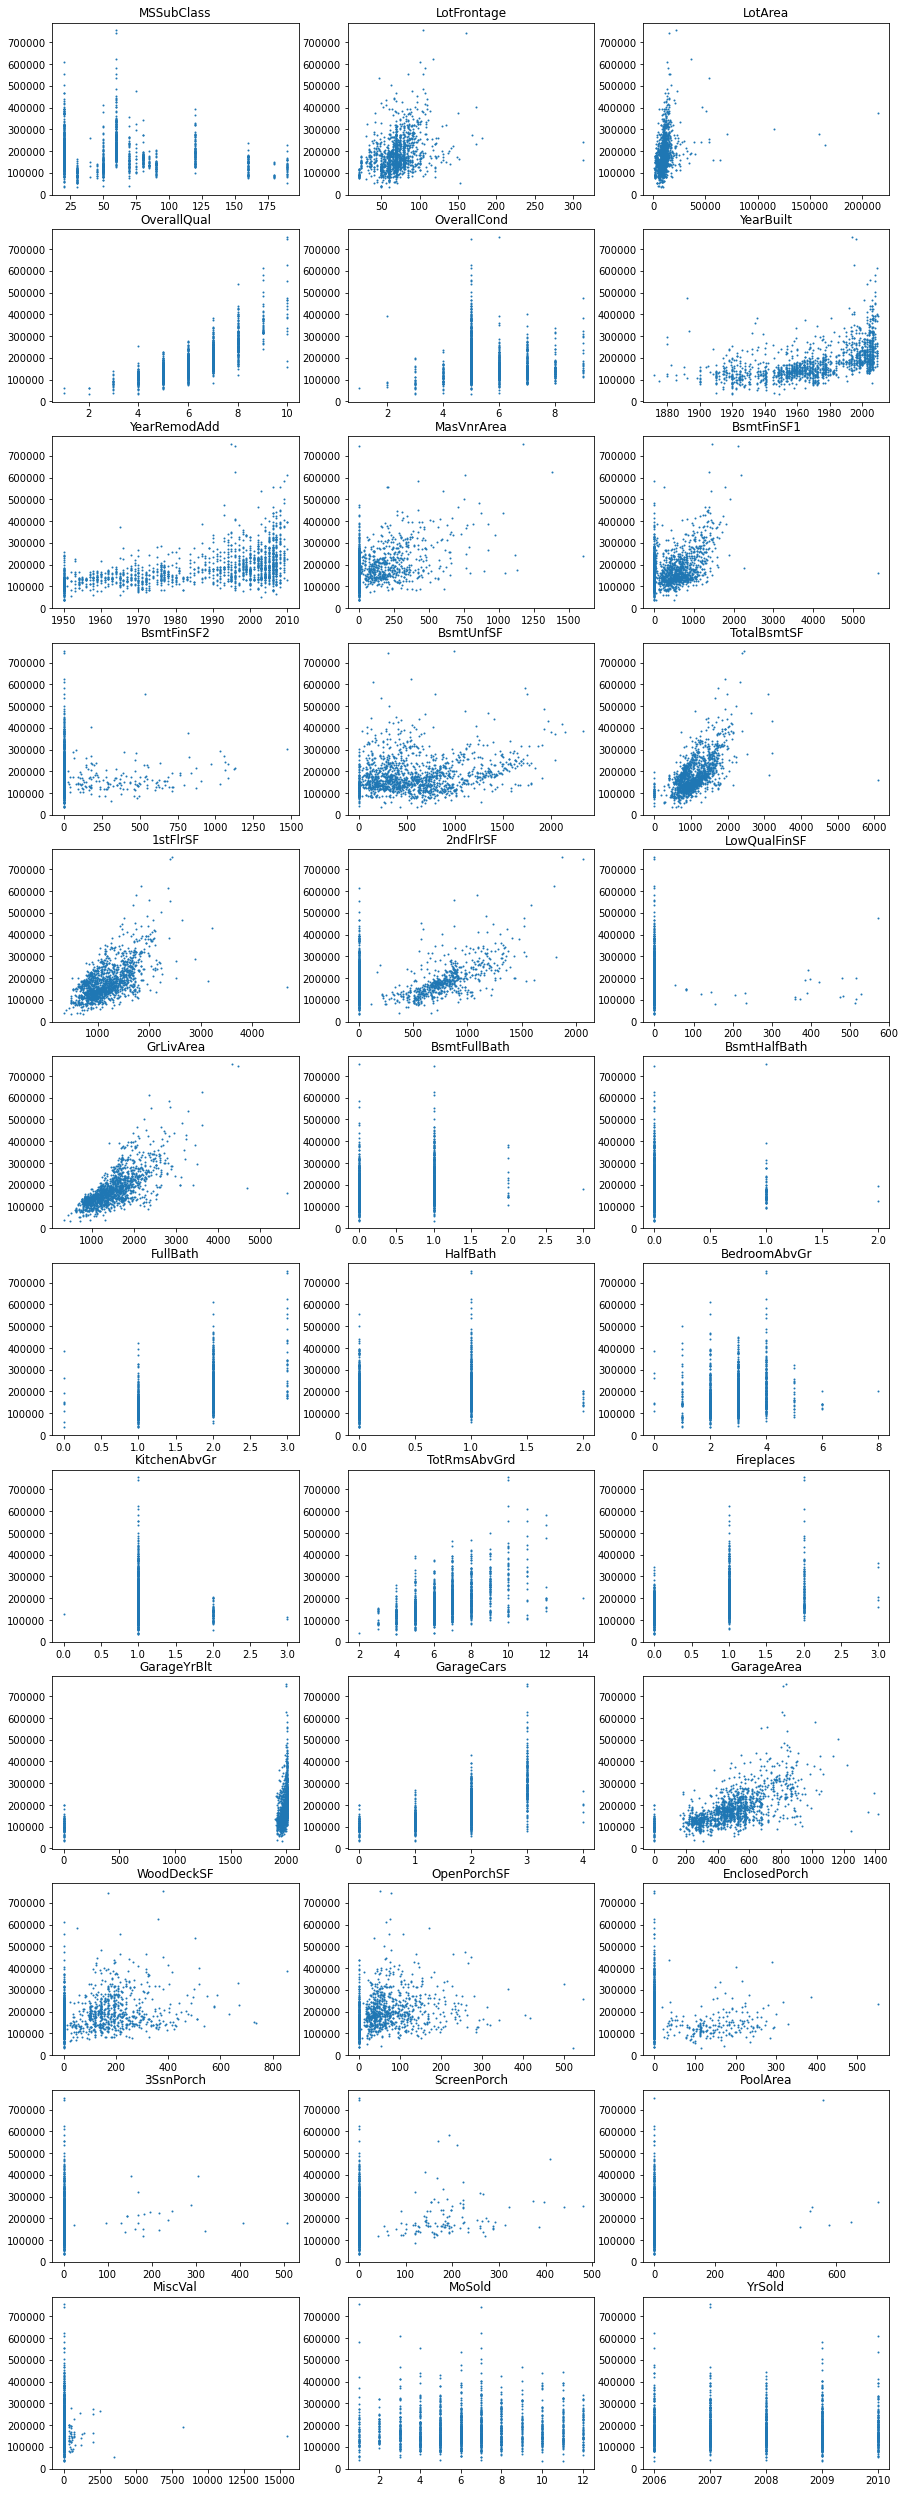

In [164]:
# Plotting Total vs Other numerical data to check graphical relationships

n_columns = 3   # max figures in single row
n_rows = int(len(numerical_col)/n_columns)  # max number of rows
fig,a = plt.subplots(n_rows, n_columns,figsize = (15,45))


current_row = 0
current_col = 0
total_fig = 0
for col in numerical_col:
    if current_row == n_rows:
        break
    a[current_row][current_col].scatter(housing_clean[col], housing_clean['SalePrice'], s = 1)  # y axis is sales price
    a[current_row][current_col].set_title(col)
    current_col +=1
    if current_col%3 == 0:
        current_row += 1
        current_col = 0

In [167]:
# It appears that overall quality, garage features and year built are most related to sales price
# Getting the age order of the houses i.e newest house age - oldest house age

now_year = 2020
housing_clean['age'] = housing_clean['YrSold'] - housing_clean['YearBuilt']
housing_clean.drop(['YearBuilt','YrSold'], axis = 1, inplace = True)

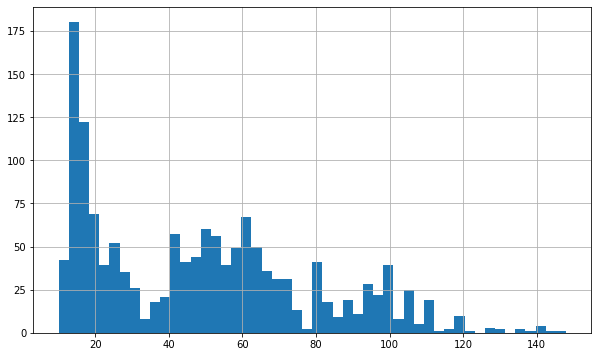

In [112]:
# Stratified sampling
plt.figure(figsize = (10,6))
housing_clean['age'].hist(bins = 50)

In [ ]:
# creating age category of 1.10 bin size and all greater than 120 are listed in one single bin
import numpy as np

housing_clean['age'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace = True)
housing['income_cat'].hist()

## Encoding and Standardisation

In [169]:
housing_enc = housing_clean.copy()
numerical_col.remove('SalePrice')
numerical_col.remove('YearBuilt')

ValueError: list.remove(x): x not in list

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_enc[numerical_col] = scaler.fit_transform(housing_clean[numerical_col])

In [ ]:
housing_enc.head(2)

In [ ]:
# Using pandas dummies feature for one hot encoding
categ_encoded = pd.get_dummies(housing_enc[categorical_col], drop_first = True)
housing_enc = pd.concat([housing_enc,categ_encoded], axis = 1)
housing_enc.drop(categorical_col, axis = 1, inplace = True)
print('Old Shape is ', housing_clean.shape,'\n'+'New Shape is ', housing_enc.shape)
housing_enc.head(2)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Shuffled Split Function

test_ratio = 0.3
test_size = int(len(housing_enc)*test_ratio)
train_size = housing_enc.shape[0]-test_size
test_split, train_split = train_test_split(housing_enc,train_size = train_size, test_size = test_size, random_state = 42)
print(len(test_split),'test data and ',len(train_split),'train data')

In [ ]:
X_train = train_split.drop('SalePrice', axis = 1)
X_test = test_split.drop('SalePrice', axis = 1)
y_train = train_split['SalePrice']
y_test = test_split['SalePrice']

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': np.linspace(0,70,200)}       # params for selecting best alpha value

#fine tuning of model
ridge_performance = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',cv = 5
                                )
ridge_performance.fit(X_train, y_train)

In [170]:
alpha = ridge_performance.best_params_['alpha']
alpha

34.824120603015075

In [171]:
from sklearn.metrics import r2_score
# fitting model on training data using best parameters obtained from gridsearch_CV

ridge = Ridge(alpha = alpha)
ridge.fit(X_train,y_train)

Ridge(alpha=34.824120603015075)

In [172]:
# Performance on training data

ridge_train_pred = ridge.predict(X_train)
r2_score(ridge_train_pred,y_train)

0.9103050573392891

In [173]:
# Performance on test data

ridge_test_pred = ridge.predict(X_test)
r2_score(ridge_test_pred,y_test)

0.7727616980205748

### Variation of r2 score with different alpha

In [174]:
from sklearn.metrics import mean_squared_error as mse

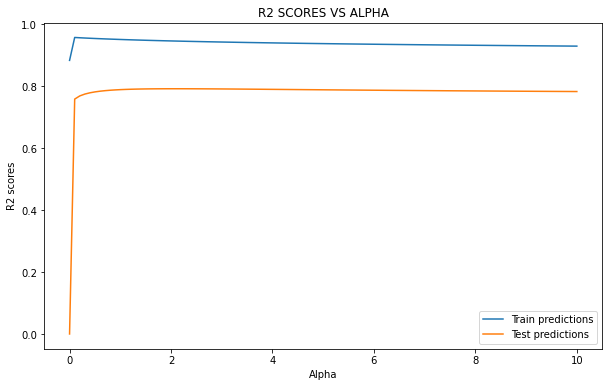

best alpha is  0.10101010101010101


In [175]:
train_pred = []
test_pred= []
alpha_best = 0
r2_max = 0
temp = 0
for alpha in np.linspace(0,10,100):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train,y_train)
    temp = r2_score(ridge.predict(X_train),y_train)

    train_pred.append(temp)
    if temp > r2_max :
        r2_max = temp
        alpha_best = alpha
        
    test_pred.append(r2_score(ridge.predict(X_test),y_test))
    
plt.figure(figsize = (10,6))
plt.plot(np.linspace(0,10,100),train_pred,  label = 'Train predictions')

plt.plot(np.linspace(0,10,100),test_pred, label = 'Test predictions')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('R2 scores')
plt.title('R2 SCORES VS ALPHA')
plt.show()
print('best alpha is ', alpha_best)

In [176]:
print(r2_max, alpha_best)
r2_score(ridge.predict(X_test),y_test)

0.957317941330076 0.10101010101010101


0.7827361571545524

## Lasso

In [197]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = 5000,tol = 300000000)

In [203]:
params = {'alpha': np.linspace(500,1000,100)}       # params for selecting best alpha value

#fine tuning of model
lasso_performance = GridSearchCV(estimator = lasso,
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = 5, ) 

In [204]:
#fitting the best model on the train data
lasso_performance.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=5000, tol=300000000),
             param_grid={'alpha': array([ 500.        ,  505.05050505,  510.1010101 ,  515.15151515,
        520.2020202 ,  525.25252525,  530.3030303 ,  535.35353535,
        540.4040404 ,  545.45454545,  550.50505051,  555.55555556,
        560.60606061,  565.65656566,  570.70707071,  575.75757576,
        580.80808081,  585.85858586,  590.90909091,  595.95959596,
        601.01010101...
        863.63636364,  868.68686869,  873.73737374,  878.78787879,
        883.83838384,  888.88888889,  893.93939394,  898.98989899,
        904.04040404,  909.09090909,  914.14141414,  919.19191919,
        924.24242424,  929.29292929,  934.34343434,  939.39393939,
        944.44444444,  949.49494949,  954.54545455,  959.5959596 ,
        964.64646465,  969.6969697 ,  974.74747475,  979.7979798 ,
        984.84848485,  989.8989899 ,  994.94949495, 1000.        ])},
             scoring='r2')

In [205]:
alpha = lasso_performance.best_params_['alpha']
alpha

782.8282828282828

In [208]:
lasso = Lasso(alpha = alpha,tol = 5000000000)

In [209]:
# training model on Training data with finetuned parameters

lasso.fit(X_train,y_train)
lasso_pred_train = lasso.predict(X_train)
r2_score(lasso_pred_train,y_train)

0.7764582803796353

In [210]:
# Test data performance

r2_score(lasso.predict(X_test),y_test)

0.5971596508303787

## Finding positive and Negative Factors for a house Price
###    (According to Ridge Regression)

In [184]:
ridge_params = ridge.coef_.copy()
ridge_var_coeff = list(zip(X_train.columns, ridge_params))
ridge_var_coeff

[('MSSubClass', -1947.5218837503512),
 ('LotFrontage', 4241.723347651537),
 ('LotArea', 9899.967708652697),
 ('OverallQual', 13559.6270518246),
 ('OverallCond', 8597.089525937185),
 ('YearRemodAdd', 735.3206466250782),
 ('MasVnrArea', 6355.931045633264),
 ('BsmtFinSF1', 9016.25542190641),
 ('BsmtFinSF2', 1972.091396757146),
 ('BsmtUnfSF', 71.74251034811401),
 ('TotalBsmtSF', 10171.141379714241),
 ('1stFlrSF', 9592.65603615506),
 ('2ndFlrSF', 12014.817860758507),
 ('LowQualFinSF', -2296.0100270838675),
 ('GrLivArea', 16825.697101996655),
 ('BsmtFullBath', -1905.7162671242922),
 ('BsmtHalfBath', 678.0093570736781),
 ('FullBath', 3998.1627747884318),
 ('HalfBath', 3274.034109919974),
 ('BedroomAbvGr', -5941.717116197149),
 ('KitchenAbvGr', -4132.811881529118),
 ('TotRmsAbvGrd', 2269.1862959129035),
 ('Fireplaces', 3633.4438489875115),
 ('GarageYrBlt', -1825.6449361214059),
 ('GarageCars', 3861.4187497132652),
 ('GarageArea', 1134.214740233208),
 ('WoodDeckSF', 4810.863074507798),
 ('OpenP

In [185]:
positive_factors, negative_factors, negligible_factors = [], [], []

for i in ridge_var_coeff:
    if i[-1] > 0:
        positive_factors.append(i)
    
    elif i[-1] < 0:
        negative_factors.append(i)
        
    else:
        negligible_factors.append(i)

In [186]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### These are all the positive factors for buying a house with their weights in descending order

In [187]:
positive_factors = pd.DataFrame(positive_factors)
positive_factors.rename({0: 'Positive_factors', 1 : 'factor_coef'}, axis = 1, inplace = True)
positive_factors = positive_factors.sort_values('factor_coef',ascending=False).reset_index().drop('index', axis = 1)
positive_factors

,Positive_factors,factor_coef
0,GrLivArea,16825.697102
1,RoofMatl_WdShngl,14378.795533
2,OverallQual,13559.627052
3,Neighborhood_StoneBr,13485.876574
4,Neighborhood_NridgHt,12416.243547
5,2ndFlrSF,12014.817861
6,Neighborhood_NoRidge,12013.360344
7,Neighborhood_Crawfor,11381.511149
8,SaleType_New,11265.572706
9,TotalBsmtSF,10171.141380


### These are all the negative factors for buying a house with their weights in ascending order.
i.e higher values for starting columns will have a great negative impact on price


In [188]:
negative_factors = pd.DataFrame(negative_factors)
negative_factors.rename({0: 'negative_factors', 1 : 'factor_coef'}, axis = 1, inplace = True)
negative_factors = negative_factors.sort_values('factor_coef',ascending=True).reset_index().drop('index', axis = 1)
negative_factors

,negative_factors,factor_coef
0,KitchenQual_Gd,-13242.551424
1,BsmtQual_Gd,-11460.381028
2,Neighborhood_NWAmes,-9883.892492
3,ExterQual_TA,-9867.658033
4,RoofMatl_Tar&Grv,-8446.241862
5,Neighborhood_Mitchel,-8345.132454
6,LandSlope_Sev,-8342.535447
7,KitchenQual_TA,-8045.561930
8,Neighborhood_Edwards,-7607.327037
9,FireplaceQu_TA,-7226.590123


### These are all the negligible factors for buying a house

In [189]:
negligible_factors = pd.DataFrame(negligible_factors)
negligible_factors.rename({0: 'negligible_factors', 1 : 'factor_coef'}, axis = 1, inplace = True)
negligible_factors = negligible_factors.sort_values('factor_coef',ascending=False).reset_index().drop('index', axis = 1)
negligible_factors

,negligible_factors,factor_coef
0,Utilities_NoSeWa,0.0
1,Exterior2nd_Other,0.0
2,SaleType_Con,0.0
3,SaleType_CWD,0.0
4,Functional_Sev,0.0
5,Electrical_NA,0.0
6,Electrical_FuseP,0.0
7,HeatingQC_Po,0.0
8,Heating_OthW,0.0
9,Foundation_Wood,0.0


# Conclusions
1) Factors mentioned in Positive factors table increase the price of house

2) Factors mentioned in negative factors table deccrease the price of house and negligible factors have no effect on price of the house

3) Company can use numerical data plot in the EDA section to understand the effects of each feature subjectively

-r2 score for Ridge on Train data = 0.8819182841511254

-r2 score for Ridge on Test data = 0.7903382466404647

-r2 score for Lasso on Train data =0.7539993667071632

-r2 score for Lasso on Test data =0.6980360355037392

Note : Ridge Regression performs better than lasso regression on this data
        Best lamda for Ridge is 8.16326530612245
        Beset lamda for Lasso is 259.18367346938777

# THANK YOU